# LinkedIn Influencer Data - Exploratory Data Analysis (EDA)

## Objective
This notebook performs comprehensive EDA to:
1. **Identify Data Gaps** - Missing values, inconsistencies, and data quality issues
2. **Assess Associated Risks** - Understanding how data gaps affect analysis reliability
3. **Evaluate Impact on Final Project** - How gaps affect building a system to help users create engaging LinkedIn posts

### Final Project Goal
Build a system that helps users create LinkedIn posts optimized for likes and comments.

---
## 1. Setup and Data Loading

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import re
from collections import Counter

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [7]:
# Load the dataset
df = pd.read_csv('influencers_data.csv')
print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")

Dataset loaded: 34,012 rows, 19 columns


In [8]:
# Display first few rows
df.head(3)

,slno,name,headline,location,followers,connections,about,time_spent,content,content_links,media_type,media_url,num_hashtags,hashtag_followers,hashtags,reactions,comments,views,votes
0,0,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone a light on the mismatch between employers seeking...,1 day ago,Robert Lerman writes that achieving a healthy future of work requires employees to build skills...,"[['https://www.linkedin.com/in/ACoAAACy1HkBviRGLfLG__Jk8FRH2JY2rGg3nTU', 'Robert Lerman'], ['htt...",article,['https://www.urban.org/urban-wire/its-time-modernize-american-apprenticeship-system'],4,0,"[['#workbasedlearning', 'https://www.linkedin.com/feed/hashtag/?keywords=workbasedlearning&highl...",12,1,NaN,NaN
1,1,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone a light on the mismatch between employers seeking...,1 week ago,"National disability advocate Sara Hart Weir, MS shares how Congress passed the ABLE act","[['https://www.linkedin.com/in/ACoAAAHsfJgBb7_L5hYnTxpQBaYBWWz9Sq_agyk', 'Sara Hart Weir, MS']]",NaN,[],0,0,[],11,0,NaN,NaN
2,2,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone a light on the mismatch between employers seeking...,2 months ago,NaN,[],NaN,[],0,0,[],15,0,NaN,NaN


In [9]:
# Basic info about the dataset
print("=" * 60)
print("DATASET INFO")
print("=" * 60)
df.info()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34012 entries, 0 to 34011
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   slno               34012 non-null  int64  
 1   name               34012 non-null  object 
 2   headline           34012 non-null  object 
 3   location           31740 non-null  object 
 4   followers          33970 non-null  float64
 5   connections        25713 non-null  object 
 6   about              34012 non-null  object 
 7   time_spent         34011 non-null  object 
 8   content            31996 non-null  object 
 9   content_links      34012 non-null  object 
 10  media_type         26779 non-null  object 
 11  media_url          34012 non-null  object 
 12  num_hashtags       34012 non-null  int64  
 13  hashtag_followers  34012 non-null  int64  
 14  hashtags           34012 non-null  object 
 15  reactions          34012 non-null  int64  
 16  comments 

In [10]:
# Column names
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")


Column names:
 1. slno
 2. name
 3. headline
 4. location
 5. followers
 6. connections
 7. about
 8. time_spent
 9. content
10. content_links
11. media_type
12. media_url
13. num_hashtags
14. hashtag_followers
15. hashtags
16. reactions
17. comments
18. views
19. votes


---
## 2. Data Gap Analysis - Missing Values

In [11]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing %': (df.isnull().sum().values / len(df) * 100).round(2),
    'Data Type': df.dtypes.values
})
missing_data = missing_data.sort_values('Missing %', ascending=False)
missing_data

,Column,Missing Count,Missing %,Data Type
17,views,34012,100.00,float64
18,votes,33926,99.75,object
5,connections,8299,24.40,object
10,media_type,7233,21.27,object
3,location,2272,6.68,object
8,content,2016,5.93,object
4,followers,42,0.12,float64
2,headline,0,0.00,object
1,name,0,0.00,object
0,slno,0,0.00,int64


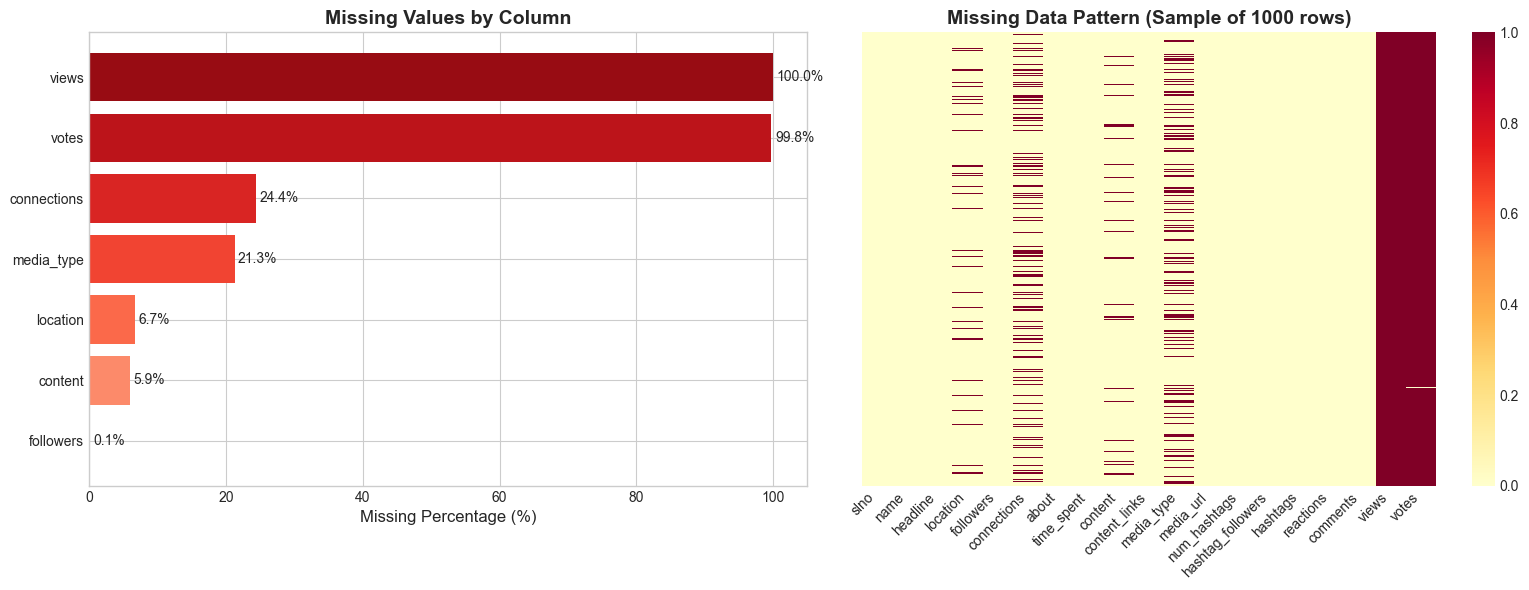

In [12]:
# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of missing percentages
missing_sorted = missing_data[missing_data['Missing %'] > 0].sort_values('Missing %', ascending=True)

if len(missing_sorted) > 0:
    colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(missing_sorted)))
    axes[0].barh(missing_sorted['Column'], missing_sorted['Missing %'], color=colors)
    axes[0].set_xlabel('Missing Percentage (%)', fontsize=12)
    axes[0].set_title('Missing Values by Column', fontsize=14, fontweight='bold')
    for i, v in enumerate(missing_sorted['Missing %']):
        axes[0].text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)
else:
    axes[0].text(0.5, 0.5, 'No Missing Values Found!', ha='center', va='center', fontsize=14)
    axes[0].set_title('Missing Values by Column', fontsize=14, fontweight='bold')

# Heatmap of missing data pattern
# Sample for visualization (full data would be too large)
sample_size = min(1000, len(df))
sample_df = df.sample(sample_size, random_state=42)
sns.heatmap(sample_df.isnull(), cbar=True, yticklabels=False, cmap='YlOrRd', ax=axes[1])
axes[1].set_title(f'Missing Data Pattern (Sample of {sample_size} rows)', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('missing_data_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

In [13]:
# Summary of data gaps
print("=" * 70)
print("DATA GAP SUMMARY")
print("=" * 70)
print(f"\nTotal columns with missing data: {(missing_data['Missing %'] > 0).sum()} / {len(df.columns)}")
print(f"\nColumns with >50% missing data:")
critical = missing_data[missing_data['Missing %'] > 50]
if len(critical) > 0:
    for _, row in critical.iterrows():
        print(f"  - {row['Column']}: {row['Missing %']:.1f}% missing")
else:
    print("  None")

print(f"\nColumns with 10-50% missing data:")
moderate = missing_data[(missing_data['Missing %'] > 10) & (missing_data['Missing %'] <= 50)]
if len(moderate) > 0:
    for _, row in moderate.iterrows():
        print(f"  - {row['Column']}: {row['Missing %']:.1f}% missing")
else:
    print("  None")

DATA GAP SUMMARY

Total columns with missing data: 7 / 19

Columns with >50% missing data:
  - views: 100.0% missing
  - votes: 99.8% missing

Columns with 10-50% missing data:
  - connections: 24.4% missing
  - media_type: 21.3% missing


---
## 3. Data Quality Analysis

In [14]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")

# Check for duplicate posts (same content)
if 'content' in df.columns:
    content_duplicates = df['content'].dropna().duplicated().sum()
    print(f"Duplicate content: {content_duplicates}")

Duplicate rows: 0 (0.00%)
Duplicate content: 757


In [15]:
# Analyze numerical columns for anomalies
numerical_cols = ['followers', 'num_hashtags', 'hashtag_followers', 'reactions', 'comments', 'views', 'votes']
existing_num_cols = [col for col in numerical_cols if col in df.columns]

print("\nNumerical Column Statistics:")
print("=" * 80)
df[existing_num_cols].describe()


Numerical Column Statistics:


,followers,num_hashtags,hashtag_followers,reactions,comments,views
count,3.397000e+04,34012.000000,34012.0,34012.000000,34012.000000,0.0
mean,1.125922e+06,2.099788,0.0,472.956486,26.977273,NaN
std,3.057750e+06,3.517457,0.0,4163.929944,216.364372,NaN
min,1.710000e+02,0.000000,0.0,0.000000,0.000000,NaN
25%,9.914800e+04,0.000000,0.0,7.000000,0.000000,NaN
50%,4.082540e+05,0.000000,0.0,36.000000,2.000000,NaN
75%,7.193340e+05,3.000000,0.0,143.000000,14.000000,NaN
max,1.828935e+07,48.000000,0.0,391498.000000,32907.000000,NaN


In [16]:
# Check for negative values or unrealistic values
print("\nData Quality Checks for Numerical Columns:")
print("-" * 60)

for col in existing_num_cols:
    if col in df.columns:
        # Convert to numeric, coercing errors
        numeric_col = pd.to_numeric(df[col], errors='coerce')
        negatives = (numeric_col < 0).sum()
        zeros = (numeric_col == 0).sum()
        valid_count = numeric_col.notna().sum()
        
        print(f"\n{col}:")
        print(f"  Valid values: {valid_count:,} ({valid_count/len(df)*100:.1f}%)")
        print(f"  Negative values: {negatives}")
        print(f"  Zero values: {zeros} ({zeros/len(df)*100:.1f}%)")
        if valid_count > 0:
            print(f"  Range: {numeric_col.min():.0f} to {numeric_col.max():,.0f}")


Data Quality Checks for Numerical Columns:
------------------------------------------------------------

followers:
  Valid values: 33,970 (99.9%)
  Negative values: 0
  Zero values: 0 (0.0%)
  Range: 171 to 18,289,351

num_hashtags:
  Valid values: 34,012 (100.0%)
  Negative values: 0
  Zero values: 19607 (57.6%)
  Range: 0 to 48

hashtag_followers:
  Valid values: 34,012 (100.0%)
  Negative values: 0
  Zero values: 34012 (100.0%)
  Range: 0 to 0

reactions:
  Valid values: 34,012 (100.0%)
  Negative values: 0
  Zero values: 1055 (3.1%)
  Range: 0 to 391,498

comments:
  Valid values: 34,012 (100.0%)
  Negative values: 0
  Zero values: 10898 (32.0%)
  Range: 0 to 32,907

views:
  Valid values: 0 (0.0%)
  Negative values: 0
  Zero values: 0 (0.0%)

votes:
  Valid values: 72 (0.2%)
  Negative values: 0
  Zero values: 0 (0.0%)
  Range: 11 to 955


In [17]:
# Analyze 'connections' column (often has '500+' text)
if 'connections' in df.columns:
    print("\nConnections column value distribution:")
    print(df['connections'].value_counts().head(10))


Connections column value distribution:
connections
500+    25633
171        80
Name: count, dtype: int64


In [18]:
# Analyze time_spent column
if 'time_spent' in df.columns:
    print("\nTime Spent (since post upload) - Sample values:")
    print(df['time_spent'].value_counts().head(15))


Time Spent (since post upload) - Sample values:
time_spent
1 year ago       7753
2 years ago      5728
3 years ago      3759
4 years ago      2126
3 months ago     1456
2 months ago     1448
4 months ago     1279
10 months ago    1247
11 months ago    1133
8 months ago     1121
1 month ago      1120
9 months ago     1115
7 months ago      942
5 months ago      904
6 months ago      855
Name: count, dtype: int64


In [19]:
# Analyze media_type distribution
if 'media_type' in df.columns:
    print("\nMedia Type Distribution:")
    media_counts = df['media_type'].value_counts(dropna=False)
    print(media_counts)


Media Type Distribution:
media_type
article       15144
image          8708
NaN            7233
video          2690
document        113
poll             86
entity           32
newsletter        4
view              2
Name: count, dtype: int64


---
## 4. Distribution Analysis of Key Metrics

In [20]:
# Convert metrics to numeric
df['reactions_num'] = pd.to_numeric(df['reactions'], errors='coerce')
df['comments_num'] = pd.to_numeric(df['comments'], errors='coerce')
df['views_num'] = pd.to_numeric(df['views'], errors='coerce')
df['followers_num'] = pd.to_numeric(df['followers'], errors='coerce')
df['num_hashtags_num'] = pd.to_numeric(df['num_hashtags'], errors='coerce')

print("Numeric columns created for analysis")

Numeric columns created for analysis


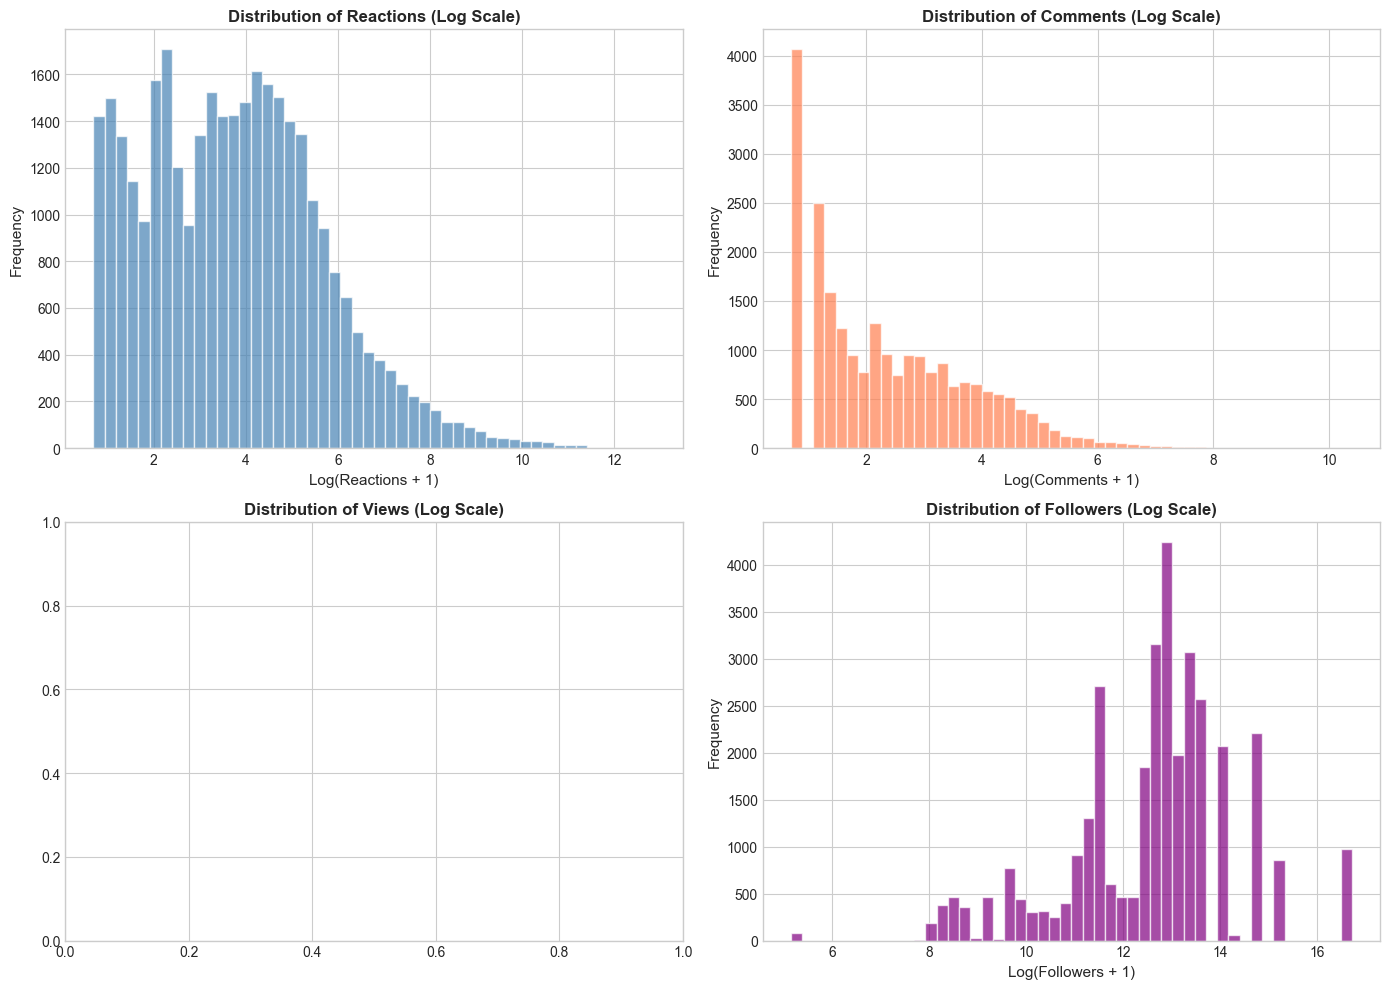

In [21]:
# Distribution of engagement metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Reactions distribution (log scale for better visibility)
ax1 = axes[0, 0]
reactions_valid = df['reactions_num'].dropna()
reactions_valid = reactions_valid[reactions_valid > 0]
if len(reactions_valid) > 0:
    ax1.hist(np.log1p(reactions_valid), bins=50, color='steelblue', edgecolor='white', alpha=0.7)
    ax1.set_xlabel('Log(Reactions + 1)', fontsize=11)
    ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Distribution of Reactions (Log Scale)', fontsize=12, fontweight='bold')

# Comments distribution
ax2 = axes[0, 1]
comments_valid = df['comments_num'].dropna()
comments_valid = comments_valid[comments_valid > 0]
if len(comments_valid) > 0:
    ax2.hist(np.log1p(comments_valid), bins=50, color='coral', edgecolor='white', alpha=0.7)
    ax2.set_xlabel('Log(Comments + 1)', fontsize=11)
    ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Distribution of Comments (Log Scale)', fontsize=12, fontweight='bold')

# Views distribution
ax3 = axes[1, 0]
views_valid = df['views_num'].dropna()
views_valid = views_valid[views_valid > 0]
if len(views_valid) > 0:
    ax3.hist(np.log1p(views_valid), bins=50, color='seagreen', edgecolor='white', alpha=0.7)
    ax3.set_xlabel('Log(Views + 1)', fontsize=11)
    ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Distribution of Views (Log Scale)', fontsize=12, fontweight='bold')

# Followers distribution
ax4 = axes[1, 1]
followers_valid = df['followers_num'].dropna()
followers_valid = followers_valid[followers_valid > 0]
if len(followers_valid) > 0:
    ax4.hist(np.log1p(followers_valid), bins=50, color='purple', edgecolor='white', alpha=0.7)
    ax4.set_xlabel('Log(Followers + 1)', fontsize=11)
    ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('Distribution of Followers (Log Scale)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('engagement_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

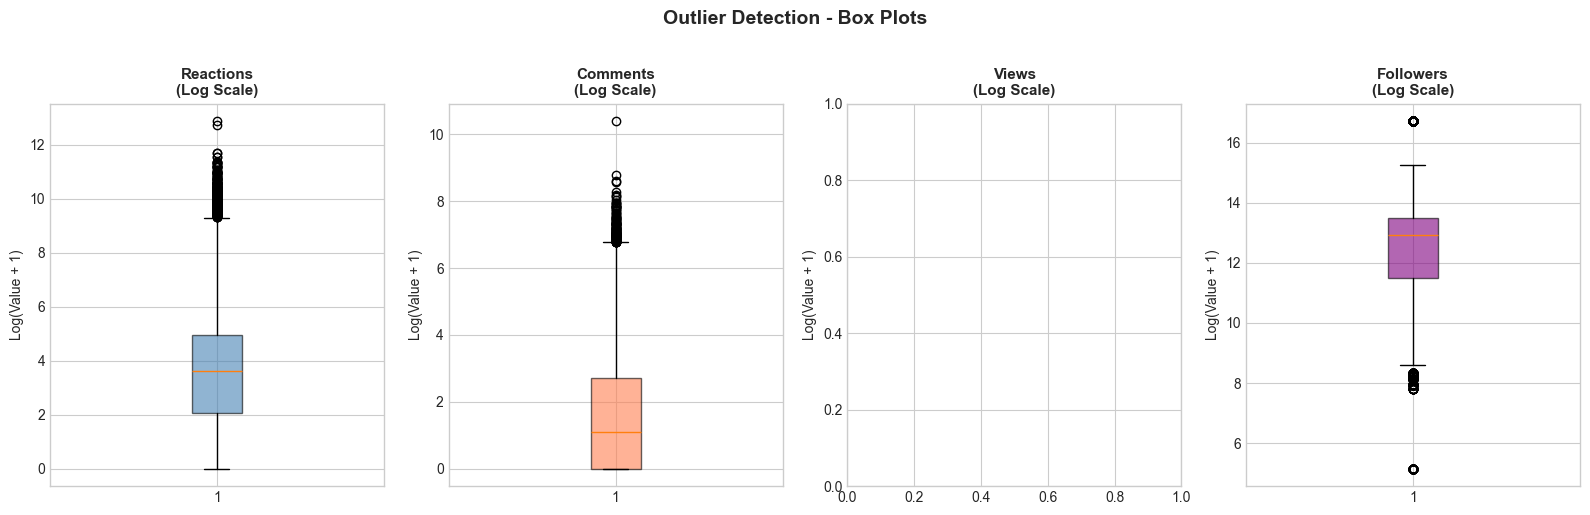

In [22]:
# Box plots for outlier detection
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

metrics = [('reactions_num', 'Reactions', 'steelblue'),
           ('comments_num', 'Comments', 'coral'),
           ('views_num', 'Views', 'seagreen'),
           ('followers_num', 'Followers', 'purple')]

for ax, (col, title, color) in zip(axes, metrics):
    data = df[col].dropna()
    if len(data) > 0:
        # Use log scale for box plot
        log_data = np.log1p(data[data >= 0])
        bp = ax.boxplot(log_data, patch_artist=True)
        bp['boxes'][0].set_facecolor(color)
        bp['boxes'][0].set_alpha(0.6)
    ax.set_title(f'{title}\n(Log Scale)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Log(Value + 1)')

plt.suptitle('Outlier Detection - Box Plots', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 5. Content Analysis

In [23]:
# Analyze content length
if 'content' in df.columns:
    df['content_length'] = df['content'].fillna('').apply(len)
    df['word_count'] = df['content'].fillna('').apply(lambda x: len(str(x).split()))
    
    print("Content Length Statistics:")
    print(f"  Average characters: {df['content_length'].mean():.0f}")
    print(f"  Median characters: {df['content_length'].median():.0f}")
    print(f"  Max characters: {df['content_length'].max():,}")
    print(f"\nWord Count Statistics:")
    print(f"  Average words: {df['word_count'].mean():.0f}")
    print(f"  Median words: {df['word_count'].median():.0f}")
    print(f"  Max words: {df['word_count'].max():,}")
    print(f"\nEmpty content rows: {(df['content_length'] == 0).sum()}")

Content Length Statistics:
  Average characters: 308
  Median characters: 210
  Max characters: 1,394

Word Count Statistics:
  Average words: 49
  Median words: 33
  Max words: 260

Empty content rows: 2016


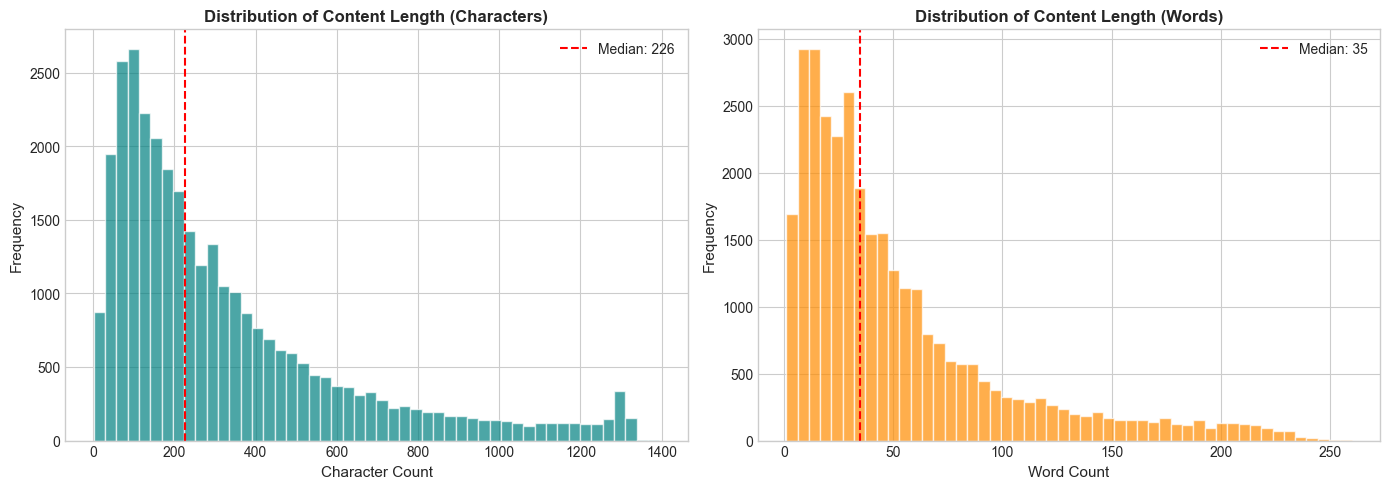

In [24]:
# Content length distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character count distribution
content_len_valid = df[df['content_length'] > 0]['content_length']
if len(content_len_valid) > 0:
    axes[0].hist(content_len_valid, bins=50, color='teal', edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Character Count', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Content Length (Characters)', fontsize=12, fontweight='bold')
axes[0].axvline(content_len_valid.median(), color='red', linestyle='--', label=f'Median: {content_len_valid.median():.0f}')
axes[0].legend()

# Word count distribution
word_count_valid = df[df['word_count'] > 0]['word_count']
if len(word_count_valid) > 0:
    axes[1].hist(word_count_valid, bins=50, color='darkorange', edgecolor='white', alpha=0.7)
axes[1].set_xlabel('Word Count', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Content Length (Words)', fontsize=12, fontweight='bold')
axes[1].axvline(word_count_valid.median(), color='red', linestyle='--', label=f'Median: {word_count_valid.median():.0f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('content_length_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


Hashtag Usage Statistics:
  Posts with hashtags: 14,405
  Posts without hashtags: 19,607
  Average hashtags per post: 2.10
  Max hashtags in a post: 48


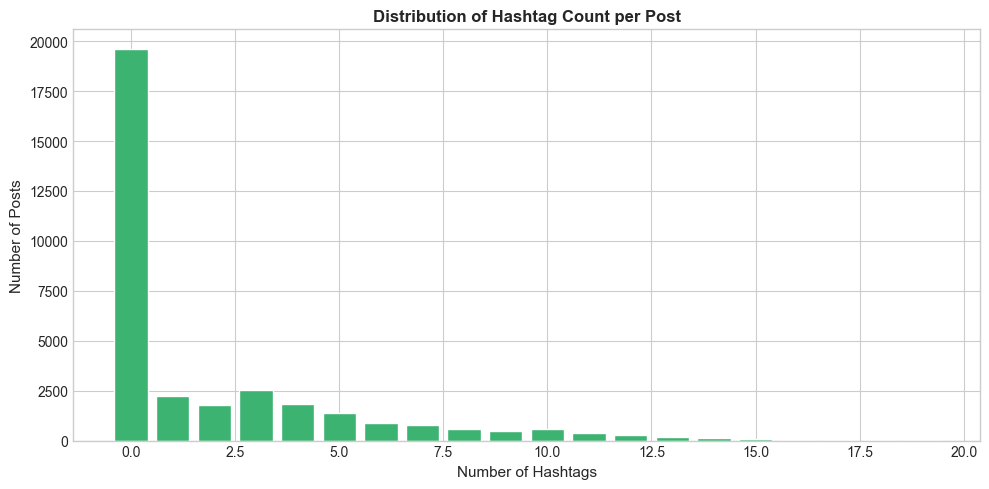

In [25]:
# Hashtag analysis
print("\nHashtag Usage Statistics:")
print(f"  Posts with hashtags: {(df['num_hashtags_num'] > 0).sum():,}")
print(f"  Posts without hashtags: {(df['num_hashtags_num'] == 0).sum():,}")
print(f"  Average hashtags per post: {df['num_hashtags_num'].mean():.2f}")
print(f"  Max hashtags in a post: {df['num_hashtags_num'].max():.0f}")

# Hashtag distribution
plt.figure(figsize=(10, 5))
hashtag_counts = df['num_hashtags_num'].value_counts().sort_index().head(20)
plt.bar(hashtag_counts.index, hashtag_counts.values, color='mediumseagreen', edgecolor='white')
plt.xlabel('Number of Hashtags', fontsize=11)
plt.ylabel('Number of Posts', fontsize=11)
plt.title('Distribution of Hashtag Count per Post', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('hashtag_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

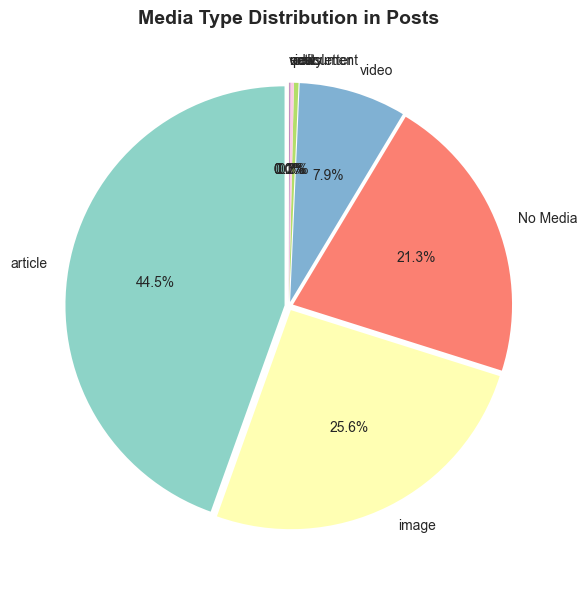

In [26]:
# Media type analysis
if 'media_type' in df.columns:
    plt.figure(figsize=(10, 6))
    media_counts = df['media_type'].value_counts(dropna=False)
    
    # Replace NaN with 'No Media'
    media_counts.index = media_counts.index.fillna('No Media')
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(media_counts)))
    plt.pie(media_counts.values, labels=media_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=[0.02]*len(media_counts))
    plt.title('Media Type Distribution in Posts', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('media_type_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()

---
## 6. Correlation Analysis

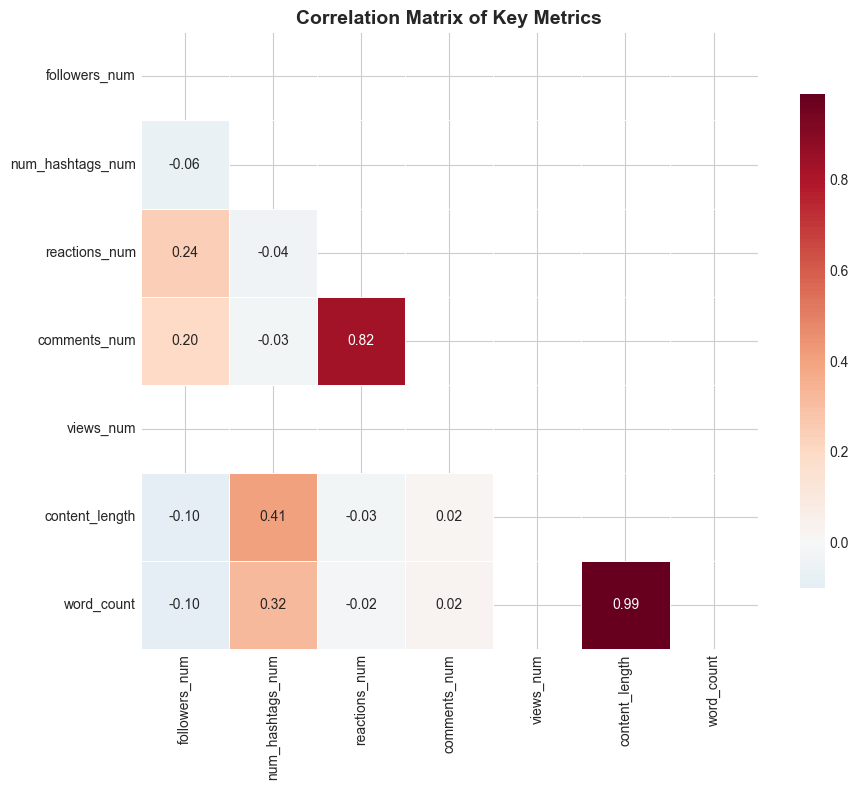

In [27]:
# Select numeric columns for correlation
corr_cols = ['followers_num', 'num_hashtags_num', 'reactions_num', 'comments_num', 
             'views_num', 'content_length', 'word_count']
corr_cols = [col for col in corr_cols if col in df.columns]

# Calculate correlation matrix
corr_matrix = df[corr_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, fmt='.2f', 
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Key Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

In [28]:
# Key correlations with engagement (reactions + comments)
print("\nCorrelations with Engagement Metrics:")
print("=" * 50)
if 'reactions_num' in df.columns:
    print("\nCorrelations with Reactions:")
    for col in corr_cols:
        if col != 'reactions_num':
            corr = df['reactions_num'].corr(df[col])
            print(f"  {col}: {corr:.3f}")

if 'comments_num' in df.columns:
    print("\nCorrelations with Comments:")
    for col in corr_cols:
        if col != 'comments_num':
            corr = df['comments_num'].corr(df[col])
            print(f"  {col}: {corr:.3f}")


Correlations with Engagement Metrics:

Correlations with Reactions:
  followers_num: 0.242
  num_hashtags_num: -0.042
  comments_num: 0.823
  views_num: nan
  content_length: -0.027
  word_count: -0.021

Correlations with Comments:
  followers_num: 0.195
  num_hashtags_num: -0.028
  reactions_num: 0.823
  views_num: nan
  content_length: 0.017
  word_count: 0.025


---
## 7. Engagement by Media Type

In [29]:
# Engagement by media type
if 'media_type' in df.columns:
    media_engagement = df.groupby('media_type').agg({
        'reactions_num': ['mean', 'median', 'count'],
        'comments_num': ['mean', 'median']
    }).round(2)
    
    media_engagement.columns = ['Avg Reactions', 'Median Reactions', 'Count',
                                'Avg Comments', 'Median Comments']
    media_engagement = media_engagement.sort_values('Avg Reactions', ascending=False)
    print("\nEngagement by Media Type:")
    display(media_engagement)


Engagement by Media Type:


,Avg Reactions,Median Reactions,Count,Avg Comments,Median Comments
media_type,,,,,
video,865.67,114.0,2690,69.79,12.5
image,824.35,87.5,8708,39.73,6.0
article,160.65,13.0,15144,10.07,1.0
document,95.35,51.0,113,29.07,9.0
poll,57.91,29.5,86,34.01,22.5
entity,50.06,13.5,32,4.38,0.0
newsletter,17.50,19.0,4,1.00,1.0
view,4.00,4.0,2,0.00,0.0


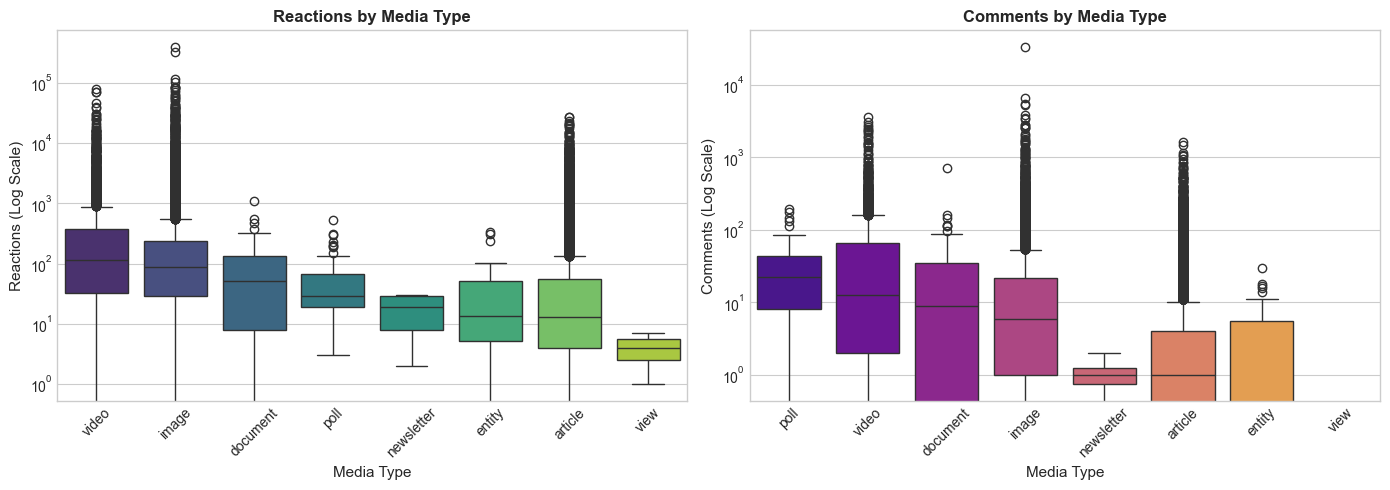

In [30]:
# Visualize engagement by media type
if 'media_type' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Remove NaN media types for cleaner visualization
    df_media = df[df['media_type'].notna()].copy()
    
    # Box plot for reactions
    media_order = df_media.groupby('media_type')['reactions_num'].median().sort_values(ascending=False).index
    sns.boxplot(data=df_media, x='media_type', y='reactions_num', order=media_order, ax=axes[0], palette='viridis')
    axes[0].set_yscale('log')
    axes[0].set_xlabel('Media Type', fontsize=11)
    axes[0].set_ylabel('Reactions (Log Scale)', fontsize=11)
    axes[0].set_title('Reactions by Media Type', fontsize=12, fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Box plot for comments
    media_order = df_media.groupby('media_type')['comments_num'].median().sort_values(ascending=False).index
    sns.boxplot(data=df_media, x='media_type', y='comments_num', order=media_order, ax=axes[1], palette='plasma')
    axes[1].set_yscale('log')
    axes[1].set_xlabel('Media Type', fontsize=11)
    axes[1].set_ylabel('Comments (Log Scale)', fontsize=11)
    axes[1].set_title('Comments by Media Type', fontsize=12, fontweight='bold')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('engagement_by_media.png', dpi=150, bbox_inches='tight')
    plt.show()

---
## 8. Top Performers Analysis

In [31]:
# Top influencers by average engagement
if 'name' in df.columns:
    influencer_stats = df.groupby('name').agg({
        'reactions_num': ['mean', 'sum', 'count'],
        'comments_num': ['mean', 'sum'],
        'followers_num': 'first'
    }).round(2)
    
    influencer_stats.columns = ['Avg Reactions', 'Total Reactions', 'Post Count',
                                'Avg Comments', 'Total Comments', 'Followers']
    
    # Filter to influencers with at least 5 posts
    influencer_stats = influencer_stats[influencer_stats['Post Count'] >= 5]
    
    print("\nTop 15 Influencers by Average Reactions (min 5 posts):")
    display(influencer_stats.sort_values('Avg Reactions', ascending=False).head(15))


Top 15 Influencers by Average Reactions (min 5 posts):


,Avg Reactions,Total Reactions,Post Count,Avg Comments,Total Comments,Followers
name,,,,,,
Simon Sinek,16641.36,4393318,264,441.13,116458,4206024.0
Richard Branson,5186.08,5056427,975,235.70,229808,18289351.0
Kevin O'Leary,2784.41,1180588,424,193.15,81894,2826016.0
Ian Bremmer,2158.44,1273477,590,99.41,58654,3733192.0
Vani Kola,1165.50,1106058,949,45.56,43235,1185109.0
Quentin Michael Allums,490.12,179384,366,118.87,43506,66387.0
Tom Goodwin,375.39,477495,1272,66.86,85048,719334.0
James Altucher,337.92,380158,1125,26.68,30011,1268865.0
Natalie Riso,248.07,48373,195,22.27,4343,405743.0


In [32]:
# Engagement rate analysis (reactions per 1000 followers)
df['engagement_rate'] = (df['reactions_num'] / df['followers_num']) * 1000
df['engagement_rate'] = df['engagement_rate'].replace([np.inf, -np.inf], np.nan)

print("\nEngagement Rate (Reactions per 1000 followers):")
print(f"  Mean: {df['engagement_rate'].mean():.2f}")
print(f"  Median: {df['engagement_rate'].median():.2f}")
print(f"  Std: {df['engagement_rate'].std():.2f}")


Engagement Rate (Reactions per 1000 followers):
  Mean: 0.77
  Median: 0.11
  Std: 3.91


---
## 9. Data Gap Risk Assessment

In [33]:
# Create comprehensive data gap report
print("=" * 80)
print("DATA GAP RISK ASSESSMENT")
print("=" * 80)

gaps = []

# Check each critical column
critical_columns = {
    'views': ('Post views', 'HIGH', 'Cannot assess reach/virality'),
    'votes': ('Poll votes', 'LOW', 'Only relevant for poll posts'),
    'location': ('Location', 'MEDIUM', 'Cannot do geographic analysis'),
    'about': ('Bio/About', 'LOW', 'Limited impact on post analysis'),
    'hashtag_followers': ('Hashtag followers', 'MEDIUM', 'Cannot assess hashtag potential'),
    'content': ('Post content', 'CRITICAL', 'Core feature - cannot analyze text patterns'),
    'reactions': ('Reactions', 'CRITICAL', 'Core target variable'),
    'comments': ('Comments', 'CRITICAL', 'Core target variable')
}

for col, (desc, severity, impact) in critical_columns.items():
    if col in df.columns:
        missing_pct = df[col].isnull().sum() / len(df) * 100
        gaps.append({
            'Column': col,
            'Description': desc,
            'Missing %': f'{missing_pct:.1f}%',
            'Severity': severity,
            'Impact': impact
        })

gap_df = pd.DataFrame(gaps)
gap_df = gap_df.sort_values('Missing %', ascending=False)
display(gap_df)

DATA GAP RISK ASSESSMENT


,Column,Description,Missing %,Severity,Impact
1,votes,Poll votes,99.7%,LOW,Only relevant for poll posts
2,location,Location,6.7%,MEDIUM,Cannot do geographic analysis
5,content,Post content,5.9%,CRITICAL,Core feature - cannot analyze text patterns
0,views,Post views,100.0%,HIGH,Cannot assess reach/virality
3,about,Bio/About,0.0%,LOW,Limited impact on post analysis
4,hashtag_followers,Hashtag followers,0.0%,MEDIUM,Cannot assess hashtag potential
6,reactions,Reactions,0.0%,CRITICAL,Core target variable
7,comments,Comments,0.0%,CRITICAL,Core target variable


In [34]:
# Analyze rows with complete engagement data
engagement_cols = ['reactions_num', 'comments_num']
complete_engagement = df[engagement_cols].notna().all(axis=1).sum()

print(f"\nData Completeness for Engagement Analysis:")
print(f"  Rows with complete engagement data: {complete_engagement:,} ({complete_engagement/len(df)*100:.1f}%)")
print(f"  Rows missing engagement data: {len(df) - complete_engagement:,} ({(len(df) - complete_engagement)/len(df)*100:.1f}%)")

# Check views availability
views_available = df['views_num'].notna().sum()
print(f"\n  Rows with views data: {views_available:,} ({views_available/len(df)*100:.1f}%)")


Data Completeness for Engagement Analysis:
  Rows with complete engagement data: 34,012 (100.0%)
  Rows missing engagement data: 0 (0.0%)

  Rows with views data: 0 (0.0%)


---
## 10. Impact Analysis on Final Project

In [35]:
print("=" * 80)
print("IMPACT ANALYSIS ON FINAL PROJECT")
print("(System to help users create engaging LinkedIn posts)")
print("=" * 80)

print("\n" + "="*80)
print("1. CONTENT OPTIMIZATION FEATURES")
print("="*80)

content_available = df['content'].notna().sum()
print(f"\n  Content data available: {content_available:,} posts ({content_available/len(df)*100:.1f}%)")
print("  \n  IMPACT:")
print("  + Can analyze text patterns, length, structure")
print("  + Can build NLP models for content suggestions")
print("  + Can identify keywords associated with high engagement")
if content_available < len(df) * 0.9:
    print("  - Some posts missing content - may affect model training")

IMPACT ANALYSIS ON FINAL PROJECT
(System to help users create engaging LinkedIn posts)

1. CONTENT OPTIMIZATION FEATURES

  Content data available: 31,996 posts (94.1%)
  
  IMPACT:
  + Can analyze text patterns, length, structure
  + Can build NLP models for content suggestions
  + Can identify keywords associated with high engagement


In [36]:
print("\n" + "="*80)
print("2. HASHTAG RECOMMENDATION FEATURES")
print("="*80)

hashtag_data = df['hashtags'].notna().sum()
hashtag_followers_data = df['hashtag_followers'].notna().sum()

print(f"\n  Hashtag lists available: {hashtag_data:,} posts ({hashtag_data/len(df)*100:.1f}%)")
print(f"  Hashtag followers available: {hashtag_followers_data:,} posts ({hashtag_followers_data/len(df)*100:.1f}%)")
print("  \n  IMPACT:")
print("  + Can recommend hashtags based on content")
print("  + Can analyze hashtag-engagement correlation")
if hashtag_followers_data < len(df) * 0.5:
    print("  - Limited hashtag follower data - cannot recommend by reach potential")


2. HASHTAG RECOMMENDATION FEATURES

  Hashtag lists available: 34,012 posts (100.0%)
  Hashtag followers available: 34,012 posts (100.0%)
  
  IMPACT:
  + Can recommend hashtags based on content
  + Can analyze hashtag-engagement correlation


In [37]:
print("\n" + "="*80)
print("3. MEDIA TYPE RECOMMENDATION")
print("="*80)

media_data = df['media_type'].notna().sum()
print(f"\n  Media type available: {media_data:,} posts ({media_data/len(df)*100:.1f}%)")
print("  \n  IMPACT:")
print("  + Can recommend optimal media type for engagement")
print("  + Can analyze media-specific engagement patterns")


3. MEDIA TYPE RECOMMENDATION

  Media type available: 26,779 posts (78.7%)
  
  IMPACT:
  + Can recommend optimal media type for engagement
  + Can analyze media-specific engagement patterns


In [38]:
print("\n" + "="*80)
print("4. ENGAGEMENT PREDICTION MODEL")
print("="*80)

# Check usable data for ML
required_cols = ['content', 'reactions_num', 'comments_num', 'media_type', 'num_hashtags_num']
ml_ready = df[required_cols].notna().all(axis=1).sum()

print(f"\n  ML-ready rows (all features): {ml_ready:,} ({ml_ready/len(df)*100:.1f}%)")
print("  \n  IMPACT:")
if ml_ready > 10000:
    print("  + Sufficient data for training engagement prediction models")
else:
    print("  - Limited complete data may affect model accuracy")
print("  + Can predict reactions/comments based on content features")

# Views gap impact
views_available = df['views_num'].notna().sum()
if views_available / len(df) < 0.3:
    print("  - CRITICAL GAP: Views data largely missing - cannot optimize for reach")


4. ENGAGEMENT PREDICTION MODEL

  ML-ready rows (all features): 26,107 (76.8%)
  
  IMPACT:
  + Sufficient data for training engagement prediction models
  + Can predict reactions/comments based on content features
  - CRITICAL GAP: Views data largely missing - cannot optimize for reach


In [39]:
print("\n" + "="*80)
print("5. TEMPORAL ANALYSIS")
print("="*80)

time_data = df['time_spent'].notna().sum()
print(f"\n  Time data available: {time_data:,} posts ({time_data/len(df)*100:.1f}%)")
print("  \n  IMPACT:")
print("  - Time is relative ('1 day ago', '2 weeks ago') not absolute")
print("  - Cannot determine optimal posting times")
print("  - Cannot do trend analysis over time")
print("  - RECOMMENDATION: Collect absolute timestamps for future data")


5. TEMPORAL ANALYSIS

  Time data available: 34,011 posts (100.0%)
  
  IMPACT:
  - Time is relative ('1 day ago', '2 weeks ago') not absolute
  - Cannot determine optimal posting times
  - Cannot do trend analysis over time
  - RECOMMENDATION: Collect absolute timestamps for future data


---
## 11. Summary and Recommendations

In [40]:
print("=" * 80)
print("EXECUTIVE SUMMARY")
print("=" * 80)

print(f"""
DATASET OVERVIEW:
- Total records: {len(df):,}
- Total columns: {len(df.columns)}
- Unique influencers: {df['name'].nunique():,}

KEY DATA GAPS IDENTIFIED:
""")

# Views gap
views_missing = df['views_num'].isna().sum() / len(df) * 100
print(f"1. VIEWS DATA: {views_missing:.1f}% missing")
print("   Risk: HIGH - Cannot assess post reach/virality")
print("   Impact: Limited ability to optimize for views")

# Location gap
location_missing = df['location'].isna().sum() / len(df) * 100
print(f"\n2. LOCATION DATA: {location_missing:.1f}% missing")
print("   Risk: MEDIUM - Cannot do geographic targeting")

# Temporal gap
print("\n3. TEMPORAL DATA: Relative time only (no absolute timestamps)")
print("   Risk: HIGH - Cannot optimize posting schedule")
print("   Impact: No day/time-based recommendations possible")

# Hashtag followers
hf_missing = df['hashtag_followers'].isna().sum() / len(df) * 100
print(f"\n4. HASHTAG FOLLOWERS: {hf_missing:.1f}% missing or zero")
print("   Risk: MEDIUM - Limited hashtag reach analysis")

EXECUTIVE SUMMARY

DATASET OVERVIEW:
- Total records: 34,012
- Total columns: 27
- Unique influencers: 69

KEY DATA GAPS IDENTIFIED:

1. VIEWS DATA: 100.0% missing
   Risk: HIGH - Cannot assess post reach/virality
   Impact: Limited ability to optimize for views

2. LOCATION DATA: 6.7% missing
   Risk: MEDIUM - Cannot do geographic targeting

3. TEMPORAL DATA: Relative time only (no absolute timestamps)
   Risk: HIGH - Cannot optimize posting schedule
   Impact: No day/time-based recommendations possible

4. HASHTAG FOLLOWERS: 0.0% missing or zero
   Risk: MEDIUM - Limited hashtag reach analysis


In [41]:
print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR FINAL PROJECT")
print("=" * 80)

print("""
1. FOCUS FEATURES (Sufficient Data):
   - Content text analysis and optimization
   - Hashtag recommendation based on content
   - Media type recommendations
   - Reactions/Comments prediction

2. DEPRIORITIZE FEATURES (Insufficient Data):
   - Views optimization (data largely missing)
   - Posting time recommendations (no absolute timestamps)
   - Geographic targeting (location data sparse)

3. DATA COLLECTION RECOMMENDATIONS:
   - Collect absolute posting timestamps
   - Ensure views data is captured consistently
   - Include engagement rate (reactions/followers) as metric
   - Track post performance over time

4. MODEL CONSIDERATIONS:
   - Use reactions + comments as primary engagement metric
   - Consider followers count for engagement rate normalization
   - Handle missing values appropriately in ML pipeline
   - Content-based features will be most reliable
""")


RECOMMENDATIONS FOR FINAL PROJECT

1. FOCUS FEATURES (Sufficient Data):
   - Content text analysis and optimization
   - Hashtag recommendation based on content
   - Media type recommendations
   - Reactions/Comments prediction

2. DEPRIORITIZE FEATURES (Insufficient Data):
   - Views optimization (data largely missing)
   - Posting time recommendations (no absolute timestamps)
   - Geographic targeting (location data sparse)

3. DATA COLLECTION RECOMMENDATIONS:
   - Collect absolute posting timestamps
   - Ensure views data is captured consistently
   - Include engagement rate (reactions/followers) as metric
   - Track post performance over time

4. MODEL CONSIDERATIONS:
   - Use reactions + comments as primary engagement metric
   - Consider followers count for engagement rate normalization
   - Handle missing values appropriately in ML pipeline
   - Content-based features will be most reliable



In [42]:
# Final data quality score
print("\n" + "=" * 80)
print("DATA QUALITY SCORE")
print("=" * 80)

# Calculate overall completeness
total_cells = len(df) * len(df.columns)
missing_cells = df.isnull().sum().sum()
completeness = (1 - missing_cells / total_cells) * 100

# Core feature completeness
core_cols = ['content', 'reactions', 'comments', 'media_type', 'num_hashtags', 'followers']
core_cols_exist = [c for c in core_cols if c in df.columns]
core_completeness = (1 - df[core_cols_exist].isnull().sum().sum() / (len(df) * len(core_cols_exist))) * 100

print(f"""
Overall Data Completeness: {completeness:.1f}%
Core Features Completeness: {core_completeness:.1f}%

Assessment: {'GOOD' if core_completeness > 80 else 'MODERATE' if core_completeness > 60 else 'NEEDS IMPROVEMENT'}

The dataset is {'suitable' if core_completeness > 70 else 'marginally suitable'} for building 
a LinkedIn post optimization system, with primary focus on content, 
hashtags, and media type recommendations.
""")


DATA QUALITY SCORE

Overall Data Completeness: 86.7%
Core Features Completeness: 95.4%

Assessment: GOOD

The dataset is suitable for building 
a LinkedIn post optimization system, with primary focus on content, 
hashtags, and media type recommendations.



In [43]:
# Create summary visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Data Completeness by Feature Type', 'Engagement Distribution',
                    'Media Type Performance', 'Content Length vs Engagement'),
    specs=[[{'type': 'bar'}, {'type': 'box'}],
           [{'type': 'bar'}, {'type': 'scatter'}]]
)

# 1. Data completeness
categories = ['Content', 'Engagement\n(Reactions)', 'Media Type', 'Hashtags', 'Views']
completeness_vals = [
    df['content'].notna().mean() * 100,
    df['reactions_num'].notna().mean() * 100,
    df['media_type'].notna().mean() * 100,
    df['num_hashtags_num'].notna().mean() * 100,
    df['views_num'].notna().mean() * 100
]
colors = ['green' if v > 80 else 'orange' if v > 50 else 'red' for v in completeness_vals]
fig.add_trace(go.Bar(x=categories, y=completeness_vals, marker_color=colors, name='Completeness'), row=1, col=1)

# 2. Engagement box plot
fig.add_trace(go.Box(y=np.log1p(df['reactions_num'].dropna()), name='Reactions (log)', marker_color='steelblue'), row=1, col=2)
fig.add_trace(go.Box(y=np.log1p(df['comments_num'].dropna()), name='Comments (log)', marker_color='coral'), row=1, col=2)

# 3. Media type performance
if 'media_type' in df.columns:
    media_perf = df.groupby('media_type')['reactions_num'].median().sort_values(ascending=False).head(6)
    fig.add_trace(go.Bar(x=media_perf.index, y=media_perf.values, marker_color='mediumseagreen', name='Median Reactions'), row=2, col=1)

# 4. Content length vs engagement (sample)
sample = df[['content_length', 'reactions_num']].dropna().sample(min(1000, len(df)))
fig.add_trace(go.Scatter(x=sample['content_length'], y=np.log1p(sample['reactions_num']),
                         mode='markers', marker=dict(size=4, opacity=0.5, color='purple'), name='Posts'), row=2, col=2)

fig.update_layout(height=700, showlegend=False, title_text='LinkedIn Influencer Data - EDA Summary')
fig.update_yaxes(title_text='Completeness %', row=1, col=1)
fig.update_yaxes(title_text='Log(Value + 1)', row=1, col=2)
fig.update_yaxes(title_text='Median Reactions', row=2, col=1)
fig.update_yaxes(title_text='Log(Reactions + 1)', row=2, col=2)
fig.update_xaxes(title_text='Content Length', row=2, col=2)

fig.write_html('eda_summary_interactive.html')
fig.show()

In [44]:
print("\n" + "=" * 80)
print("EDA COMPLETE")
print("=" * 80)
print("""
Generated artifacts:
- missing_data_analysis.png
- engagement_distributions.png  
- outlier_boxplots.png
- content_length_distribution.png
- hashtag_distribution.png
- media_type_distribution.png
- correlation_matrix.png
- engagement_by_media.png
- eda_summary_interactive.html (interactive Plotly dashboard)
""")


EDA COMPLETE

Generated artifacts:
- missing_data_analysis.png
- engagement_distributions.png  
- outlier_boxplots.png
- content_length_distribution.png
- hashtag_distribution.png
- media_type_distribution.png
- correlation_matrix.png
- engagement_by_media.png
- eda_summary_interactive.html (interactive Plotly dashboard)

